# Homework 4

### by Cemre Çelebi

In [632]:
library("readxl")
require(plyr)
library(dplyr)
library("MLmetrics")
library("data.table")
library("readr")
library(tidyverse)
require(glmnet)
require(lubridate)
require(tidyr)
library("glmnet")
library("Rmpfr")
library("CVXR")
library("skimr")
require(caret)
require(gbm)
require(rpart)
require(ranger)
require(rattle)
require(lattice)
require(tigerstats)

Loading required package: tigerstats

Loading required package: abd

Loading required package: mosaic

Error: package or namespace load failed for ‘mosaic’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘haven’ 2.2.0 is already loaded, but >= 2.3.1 is required



# Data 1: 

## Default of Credit Card Clients

* Data Set Characteristics:  Multivariate

* Number of Instances: 30000

* Attribute Characteristics: Integer, Real

* Number of Attributes: 24

Brief description:

This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. 
  The past monthly payment records (from April to September, 2005) as follows:
  X6 = the repayment status in September, 2005; 
  X7 = the repayment status in August, 2005; . . .; 
  X11 = the repayment status in April, 2005. 
        The measurement scale for the repayment status is: 
        -1 = pay duly; 
         1 = payment delay for one month; 
         2 = payment delay for two months; . . .
         .
         .
         .
         8 = payment delay for eight months; 
         9 = payment delay for nine months and above.

* X12-X17: Amount of bill statement (NT dollar). 
* X18-X23: Amount of previous payment (NT dollar). 

Additionally;
* no separate test data (last 2000 will be tested.)

* Class imbalance exist for Y. 
        0: 23364
        1: 6636

In [658]:
#First row of raw data, which is just specifying the variables as Xis and Y, is discarde to avoid contradiction. 
creditcard <- read_excel("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW4/Hw4 ie582 data/gonlume yatanlar/default of credit card clients.xls")
#str(creditcard),

colnames(creditcard)[25] = "Y"

In [659]:
#summary(is.na(creditcard))
train_creditcard<- creditcard[1:21000,]
test_creditcard <- creditcard%>%anti_join(train_creditcard)

Joining, by = c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "Y")



In [660]:
#dim(test_creditcard) #9000 25
#dim(train_creditcard) #21000 25

In [661]:
colnames(test_creditcard)[25] = "Y"
colnames(train_creditcard)[25] = "Y"

summary(as.factor(creditcard$Y)) # 0:23364 1:6636
creditcard$Y <- as.factor(creditcard$Y)

0     1 
23364  6636

### PRA for CreditCard Data Set

In [662]:
set.seed(2019702030)

X <-as.matrix(train_creditcard%>%select(-Y)%>%select(-ID))
PRA_creditcard = cv.glmnet(x = X, y=as.factor(train_creditcard$Y), family="binomial",  nfolds = 10, alpha=1)

X <-as.matrix(test_creditcard%>%select(-Y)%>%select(-ID))
Predicted_by_PRA = predict(PRA_creditcard, newx=X, s=c("lambda.min"), type="class")[,1]


In [663]:
PRA_creditcard
Predicted_by_PRA <- data.frame(Predicted_by_PRA)
#Predicted_by_PRA
#str(Predicted_by_PRA)


Call:  cv.glmnet(x = X, y = as.factor(train_creditcard$Y), nfolds = 10,      family = "binomial", alpha = 1) 

Measure: Binomial Deviance 

      Lambda Measure       SE Nonzero
min 0.000979  0.9501 0.005121      19
1se 0.008319  0.9549 0.004997      11

### DT for CreditCard Data Set

In [10]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard1=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(1))) #
dt_creditcard1

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3967115  0.1462823  0.2753357
  0.0010  0.3760088  0.1984344  0.2792722
  0.0015  0.3762977  0.1968990  0.2815566
  0.0020  0.3765813  0.1956159  0.2825369
  0.0025  0.3767577  0.1947892  0.2830138

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [11]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard2=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(7))) #
dt_creditcard2

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3891731  0.1618148  0.2753499
  0.0010  0.3759751  0.1985684  0.2792683
  0.0015  0.3762977  0.1968990  0.2815566
  0.0020  0.3765813  0.1956159  0.2825369
  0.0025  0.3767577  0.1947892  0.2830138

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [12]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard3=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(15))) #
dt_creditcard3

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3832223  0.1765536  0.2759573
  0.0010  0.3759089  0.1988052  0.2793254
  0.0015  0.3762977  0.1968990  0.2815566
  0.0020  0.3765813  0.1956159  0.2825369
  0.0025  0.3767577  0.1947892  0.2830138

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [36]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard5=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(30))) #
dt_creditcard5

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3794555  0.1874165  0.2767923
  0.0010  0.3757528  0.1994168  0.2794285
  0.0015  0.3763035  0.1968729  0.2815717
  0.0020  0.3765813  0.1956159  0.2825369
  0.0025  0.3767577  0.1947892  0.2830138

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [14]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard4=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(50))) #
dt_creditcard4

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3774978  0.1937979  0.2772684
  0.0010  0.3757206  0.1994831  0.2795886
  0.0015  0.3763284  0.1967671  0.2816546
  0.0020  0.3765544  0.1957325  0.2825440
  0.0025  0.3767577  0.1947892  0.2830138

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [15]:
n_repeats=5
n_folds=10
tunegrid_creditcard <- expand.grid(cp=seq(0.0005,0.0025,0.0005))
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))
set.seed(1)
dt_creditcard4=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_creditcard, 
                 trControl = fitControl, control = rpart.control(minbucket=c(100))) #
dt_creditcard4

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0005  0.3758908  0.1993424  0.2778753
  0.0010  0.3755450  0.2001430  0.2797347
  0.0015  0.3762453  0.1970735  0.2817435
  0.0020  0.3763630  0.1965136  0.2824655
  0.0025  0.3766225  0.1953583  0.2829684

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.001.

In [17]:
set.seed(2019702030)
dt_creditcard=train(Y ~ ., data = X,
                 method = "rpart", cp=0.001, 
                 trControl = fitControl, control = rpart.control(minbucket=c(30))) #
dt_creditcard

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.009963201  0.3800680  0.1805106  0.2886819
  0.029779571  0.3853519  0.1574577  0.2964264
  0.146612692  0.4041854  0.1379635  0.3261034

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.009963201.

###### Prediction with the best

In [186]:
X <-data.frame(test_creditcard%>%select(-Y)%>%select(-ID))
a <-data.frame(train_creditcard%>%select(-ID))
dt_creditcard5 = rpart::rpart(Y~., data= a ,method= "class", control = rpart.control(minbucket = 30,cp=0.001))
Predicted_by_DT = predict(dt_creditcard5, X, s=c("lambda.min"), type="class")



n= 21000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 21000 4796 0 (0.7716190 0.2283810)  
    2) PAY_0< 1.5 18694 3214 0 (0.8280732 0.1719268)  
      4) PAY_2< 1.5 17047 2524 0 (0.8519388 0.1480612) *
      5) PAY_2>=1.5 1647  690 0 (0.5810565 0.4189435)  
       10) PAY_5< 1 1127  423 0 (0.6246673 0.3753327)  
         20) PAY_AMT6>=8283 70   10 0 (0.8571429 0.1428571) *
         21) PAY_AMT6< 8283 1057  413 0 (0.6092715 0.3907285)  
           42) PAY_AMT2>=1442.5 530  180 0 (0.6603774 0.3396226) *
           43) PAY_AMT2< 1442.5 527  233 0 (0.5578748 0.4421252)  
             86) LIMIT_BAL>=125000 139   43 0 (0.6906475 0.3093525) *
             87) LIMIT_BAL< 125000 388  190 0 (0.5103093 0.4896907)  
              174) PAY_AMT5>=938 163   65 0 (0.6012270 0.3987730) *
              175) PAY_AMT5< 938 225  100 1 (0.4444444 0.5555556)  
                350) PAY_AMT2>=1015 68   31 0 (0.5441176 0.4558824) *
                351) PAY_AMT2< 1015 157   63

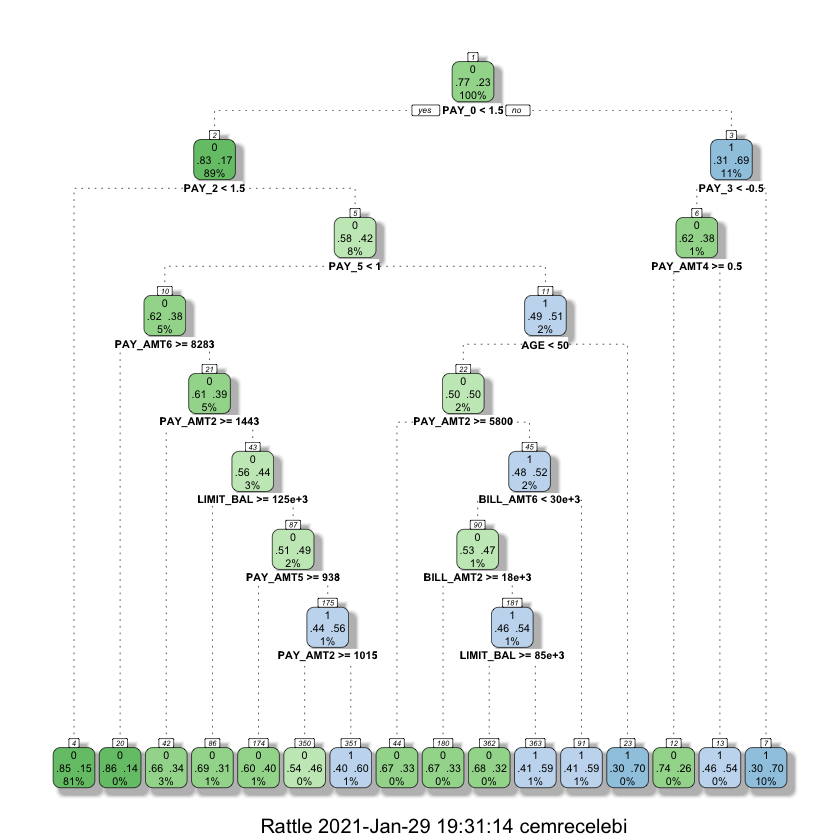

In [606]:
#Predicted_by_DT
dt_creditcard5
fancyRpartPlot(dt_creditcard5)
trellis.par.set(caretTheme())
#plot(dt_creditcard5) 

### RF for CreditCard Data Set

In [27]:

set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))

gridforest_creditcard <- expand.grid(mtry = seq(1, 10, 3) , min.node.size=5, splitrule = "variance")

rf_creditcard1 <- train(as.factor(Y) ~., data=X, method="ranger", tuneGrid= gridforest_creditcard, trControl= fitControl)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [28]:
rf_creditcard1

Random Forest 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
   1    0.3761213  0.2036854  0.2947441
   4    0.3757684  0.2001198  0.2844347
   7    0.3768640  0.1968275  0.2837932
  10    0.3776178  0.1944644  0.2840073

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 4, splitrule = variance
 and min.node.size = 5.

In [89]:

set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))

gridforest_creditcard <- expand.grid(mtry = seq(1, 10, 3) , min.node.size=5, splitrule = c("gini", "extratrees"))

rf_creditcard3 <- train(as.factor(Y) ~., data=X, method="ranger", tuneGrid= gridforest_creditcard, trControl= fitControl)

In [608]:
rf_creditcard3

Random Forest 

21000 samples
   23 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16801, 16800, 16800, 16799, 16800, 16800, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   1    gini        0.8024382  0.2810977
   1    extratrees  0.7943239  0.2110171
   4    gini        0.8107430  0.3652882
   4    extratrees  0.8105050  0.3621147
   7    gini        0.8102382  0.3672265
   7    extratrees  0.8103715  0.3661874
  10    gini        0.8099525  0.3673778
  10    extratrees  0.8100001  0.3670872

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 4, splitrule = gini
 and min.node.size = 5.

###### Prediction with the best

In [109]:
X <-as.matrix(test_creditcard%>%select(-Y)%>%select(-ID))
Predicted_by_RF = predict(rf_creditcard3,X)

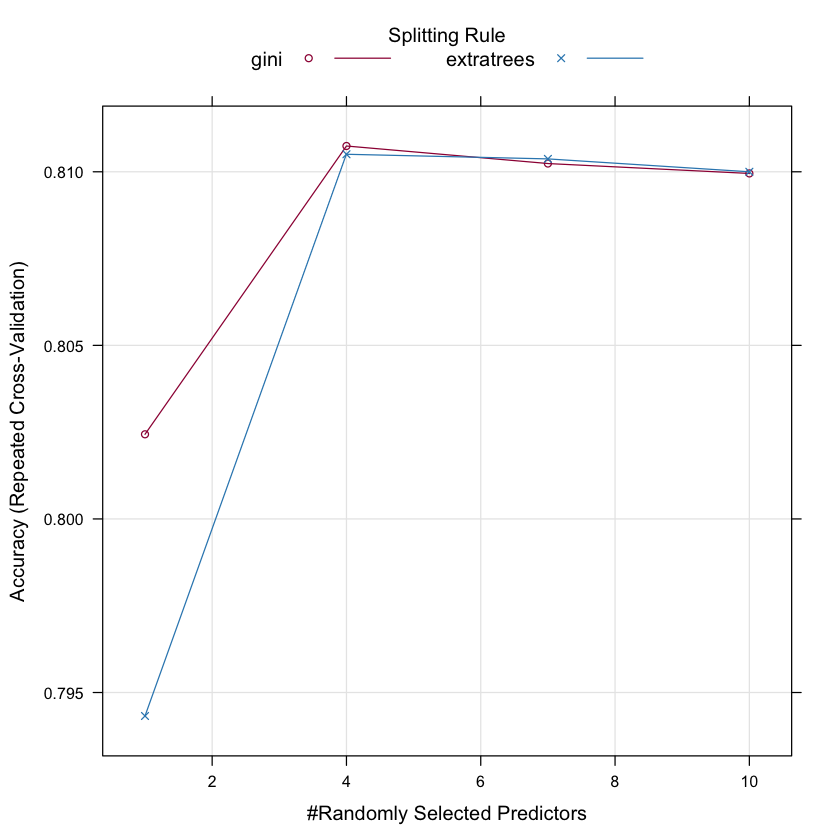

In [609]:
Predicted_by_RF<-data.frame(Predicted_by_RF)

plot(rf_creditcard3)

### SGB for CreditCard Data Set

In [192]:
set.seed(2019702030)
X <-as.matrix(train_creditcard%>%select(-ID))


gridsgb_creditcard <- expand.grid(interaction.depth=seq(1,5,2), n.trees = seq(50,250,100),shrinkage=c(0.005,0.01,0.02), n.minobsinnode=10)
sgb_creditcard <- train(Y ~., data=X, method="gbm", tuneGrid= gridsgb_creditcard, trControl= fitControl, verbose=F)


Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [193]:
sgb_creditcard

Stochastic Gradient Boosting 

21000 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 16800, 16800, 16800, 16800, 16800, 16800, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  RMSE       Rsquared   MAE      
  0.005      1                   50      0.4073102  0.1665817  0.3409981
  0.005      1                  150      0.3930825  0.1767079  0.3244025
  0.005      1                  250      0.3861120  0.1836099  0.3136536
  0.005      3                   50      0.4041022  0.1917002  0.3379575
  0.005      3                  150      0.3875553  0.1971194  0.3177639
  0.005      3                  250      0.3804240  0.2014498  0.3052333
  0.005      5                   50      0.4034349  0.2002161  0.3373828
  0.005      5                  150      0.3861664  0.2040159  0.3162303
  0.005      5                  250      0.3788886  0.2070458  0.3030558
  0.010      1  

In [199]:
X <-as.matrix(test_creditcard%>%select(-Y)%>%select(-ID))

Predicted_by_SGB = predict(sgb_creditcard,X)

In [202]:
Predicted_by_SGB <- data.frame(round(Predicted_by_SGB))

In [239]:
#Predicted_by_SGB

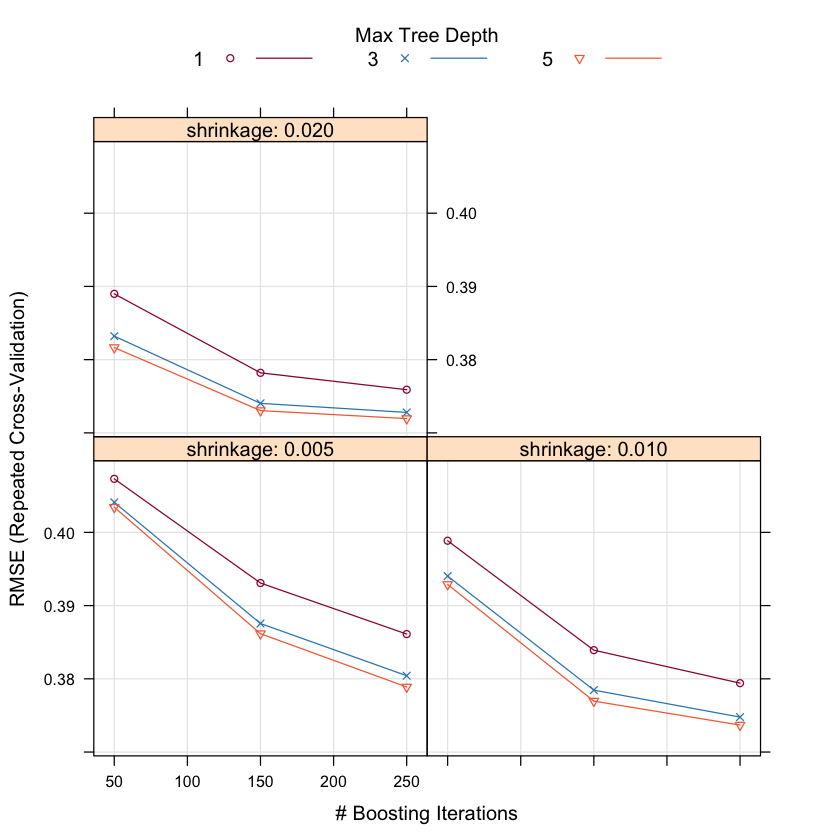

In [616]:
plot(sgb_creditcard)

## Comparison for CreditCard Data

In [666]:
#results_creditcard = resamples(list(PRA=PRA_creditcard,DT=dt_creditcard5,RF=rf_creditcard3,SGB=sgb_creditcard),metrics='Accuracy')

results_creditcard = resamples(list(RF=rf_creditcard3,SGB=sgb_creditcard),metrics='Accuracy')
summary(results_creditcard)
bwplot(results_creditcard)
densityplot(results_creditcard)
#PRA_creditcard

Warning message in resamples.default(list(RF = rf_creditcard3, SGB = sgb_creditcard), :
“Some performance measures were not computed for each model: Accuracy, Kappa, MAE, RMSE, Rsquared”



Call:
summary.resamples(object = results_creditcard)

Models: RF, SGB 
Number of resamples: 25 


ERROR: Error in Model %in% models: 'Model' nesnesi bulunamadı


In [204]:
Accuracy_creditcard_PRA = Accuracy(data.frame(as.factor(test_creditcard$Y)),Predicted_by_PRA)
Accuracy_creditcard_DT = Accuracy(data.frame(as.factor(test_creditcard$Y)),data.frame(Predicted_by_DT))
Accuracy_creditcard_RF = Accuracy(data.frame(as.factor(test_creditcard$Y)),Predicted_by_RF)
Accuracy_creditcard_SGB = Accuracy(data.frame(as.factor(test_creditcard$Y)),Predicted_by_SGB)

performance_creditcard <- data.table(Accuracy_creditcard_PRA, Accuracy_creditcard_DT, Accuracy_creditcard_RF, Accuracy_creditcard_SGB)

In [623]:
performance_creditcard

Accuracy_creditcard_PRA,Accuracy_creditcard_DT,Accuracy_creditcard_RF,Accuracy_creditcard_SGB
<dbl>,<dbl>,<dbl>,<dbl>
0.8227778,0.8357778,0.8332222,0.839


### Observations

* According to accuracy, SGB methods gives the best results as it is expected.

* Linear model(PRA) loose some information since the target variable is binary that causes PRA provided the worst result.

* DT and RF methods are slightly worsier than SGB. 

* Test and training errors are consistent to each other.



# Data 2: 

## Online News Popularity

Data Set Information:

 The articles were published by Mashable (www.mashable.com) 

Attribute Information:

Number of Attributes: 61 (58 predictive attributes,
                           2 non-predictive, 
                           1 goal field)

Feature Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

In [220]:
onlinenews <- read.csv("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW4/Hw4 ie582 data/gonlume yatanlar/OnlineNewsPopularity/OnlineNewsPopularity.csv",stringsAsFactors = FALSE)

In [221]:
#str(onlinenews)

In [222]:
train_onlinenews<- onlinenews[1:27750,]
test_onlinenews <- onlinenews%>%anti_join(train_onlinenews)

Joining, by = c("url", "timedelta", "n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "n_non_stop_unique_tokens", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", "is_weekend", "LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04", "global_subjectivity", "global_sentiment_polarity", "global_rate_positive_words", "global_rate_negative_words", "rate_positive_words", "rate_negative_words", "avg_positi

In [223]:
dim(train_onlinenews)
dim(test_onlinenews)

colnames(test_onlinenews)[61] = "Y"
colnames(train_onlinenews)[61] = "Y"
#str(test_onlinenews)

[1] 27750    61

[1] 11894    61

### PRA for OnlineNews Data Set

In [224]:
set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-Y)%>%select(-url)%>%select(-timedelta))
PRA_onlinenews = cv.glmnet(x = X, y=train_onlinenews$Y, family="gaussian", type.measure = c("mse"), nfolds = 10, alpha=1)

X <-as.matrix(test_onlinenews%>%select(-Y)%>%select(-url)%>%select(-timedelta))

In [226]:
PRA_onlinenews
onews_Predicted_by_PRA <- predict(PRA_onlinenews, newx=X, s=c("lambda.min"), type="response")[,1]


Call:  cv.glmnet(x = X, y = train_onlinenews$Y, type.measure = c("mse"),      nfolds = 10, family = "gaussian", alpha = 1) 

Measure: Mean-Squared Error 

    Lambda   Measure       SE Nonzero
min   29.4 166250949 39633329      39
1se 1331.4 169031991 39734794       0

### DT for OnlineNews Data Set

In [229]:
n_repeats=5
n_folds=10

grid_dt_onews <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta))


set.seed(1)

dt_onews1=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = grid_dt_onews, 
                 trControl = fitControl,control = rpart.control(minbucket=c(1))) #
dt_onews1

CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  18069.32  0.002077386  3683.790
  0.0010  17768.47  0.002059915  3591.686
  0.0015  17588.52  0.002236914  3551.534
  0.0020  17407.91  0.002198244  3518.252
  0.0025  17260.25  0.002199876  3493.263

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

In [230]:
n_repeats=5
n_folds=10

grid_dt_onews <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta))


set.seed(1)

dt_onews2=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = grid_dt_onews, 
                 trControl = fitControl,control = rpart.control(minbucket=c(5))) #
dt_onews2

CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  14015.67  0.002858375  3469.857
  0.0010  13899.33  0.002741289  3423.669
  0.0015  13811.78  0.001994292  3413.056
  0.0020  13756.08  0.001845208  3409.773
  0.0025  13713.22  0.001892997  3404.485

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

In [231]:
n_repeats=5
n_folds=10

grid_dt_onews <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta))


set.seed(1)

dt_onews3=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = grid_dt_onews, 
                 trControl = fitControl,control = rpart.control(minbucket=c(9))) #
dt_onews3

CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  13381.24  0.003521040  3413.090
  0.0010  13293.38  0.003374709  3385.369
  0.0015  13251.27  0.002827601  3380.256
  0.0020  13204.50  0.002701062  3372.205
  0.0025  13182.84  0.002784517  3371.370

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

In [232]:
n_repeats=5
n_folds=10

grid_dt_onews <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta))


set.seed(1)

dt_onews4=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = grid_dt_onews, 
                 trControl = fitControl,control = rpart.control(minbucket=c(13))) #
dt_onews4

CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  13169.62  0.004710656  3399.358
  0.0010  13104.00  0.004115811  3378.202
  0.0015  13078.85  0.003727295  3378.322
  0.0020  13032.88  0.003721522  3368.522
  0.0025  13004.44  0.003845988  3367.269

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

In [233]:
n_repeats=5
n_folds=10

grid_dt_onews <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta))


set.seed(1)

dt_onews5=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = grid_dt_onews, 
                 trControl = fitControl,control = rpart.control(minbucket=c(17))) #
dt_onews5

CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  13035.96  0.005694681  3381.339
  0.0010  12983.53  0.004792325  3361.518
  0.0015  12957.85  0.004650878  3360.390
  0.0020  12934.13  0.004255611  3356.394
  0.0025  12899.05  0.004598481  3348.579

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

###### Prediction with the best dt

In [236]:
X <-as.matrix(test_onlinenews%>%select(-Y)%>%select(-url)%>%select(-timedelta))

onews_Predicted_by_DT = predict(dt_onews5, X)

onews_Predicted_by_DT <- data.frame(onews_Predicted_by_DT)


CART 

27750 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 22200, 22201, 22201, 22198, 22200, 22200, ... 
Resampling results across tuning parameters:

  cp      RMSE      Rsquared     MAE     
  0.0005  13035.96  0.005694681  3381.339
  0.0010  12983.53  0.004792325  3361.518
  0.0015  12957.85  0.004650878  3360.390
  0.0020  12934.13  0.004255611  3356.394
  0.0025  12899.05  0.004598481  3348.579

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0025.

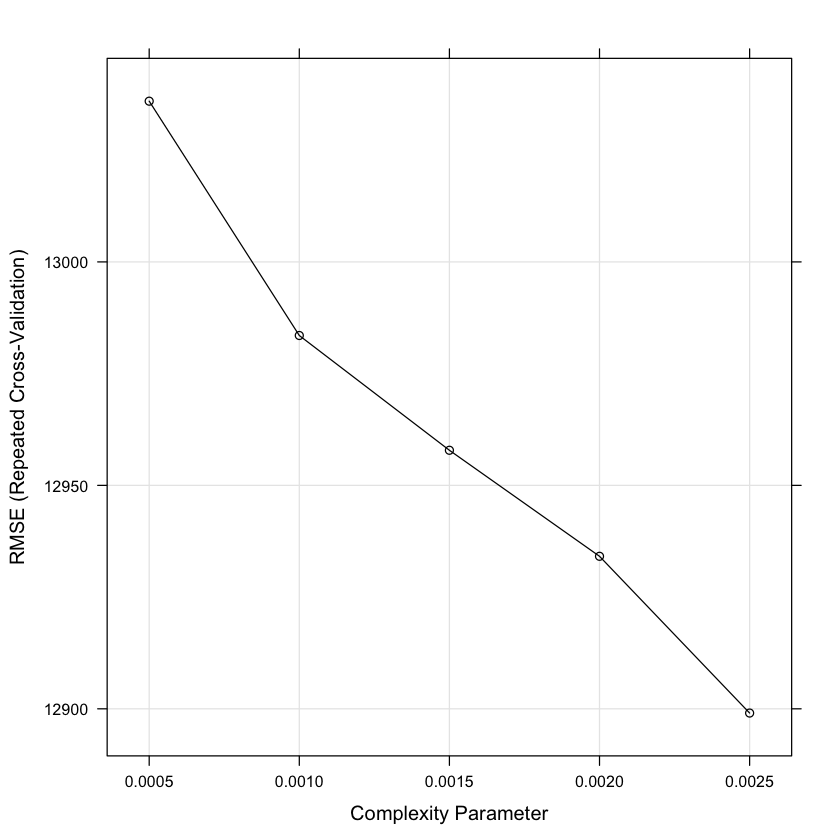

In [604]:
#onews_Predicted_by_DT
dt_onews5
#fancyRpartPlot(dt_onews5)
trellis.par.set(caretTheme())
plot(dt_onews5) 

### RF for OnlineNews Data Set

In [253]:
set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta)%>%sample_n(10000))


gridforest_onews <- expand.grid(mtry = seq(1, 7, 3), min.node.size=5, splitrule = "variance")

rf_onews3 <- train(Y ~., data=X, method="ranger",tuneGrid= gridforest_onews, trControl= fitControl)

In [255]:
rf_onews3

Random Forest 

10000 samples
   58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 7999, 7999, 8002, 7999, 8001, 8000, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared    MAE     
  1     11804.73  0.02486918  3225.358
  4     11933.98  0.02147850  3363.700
  7     12014.80  0.02016072  3423.446

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 1, splitrule = variance
 and min.node.size = 5.

In [256]:
X <-as.matrix(test_onlinenews%>%select(-Y)%>%select(-url)%>%select(-timedelta))

onews_Predicted_by_RF = predict(rf_onews3,X)

onews_Predicted_by_RF <- data.frame(onews_Predicted_by_RF)

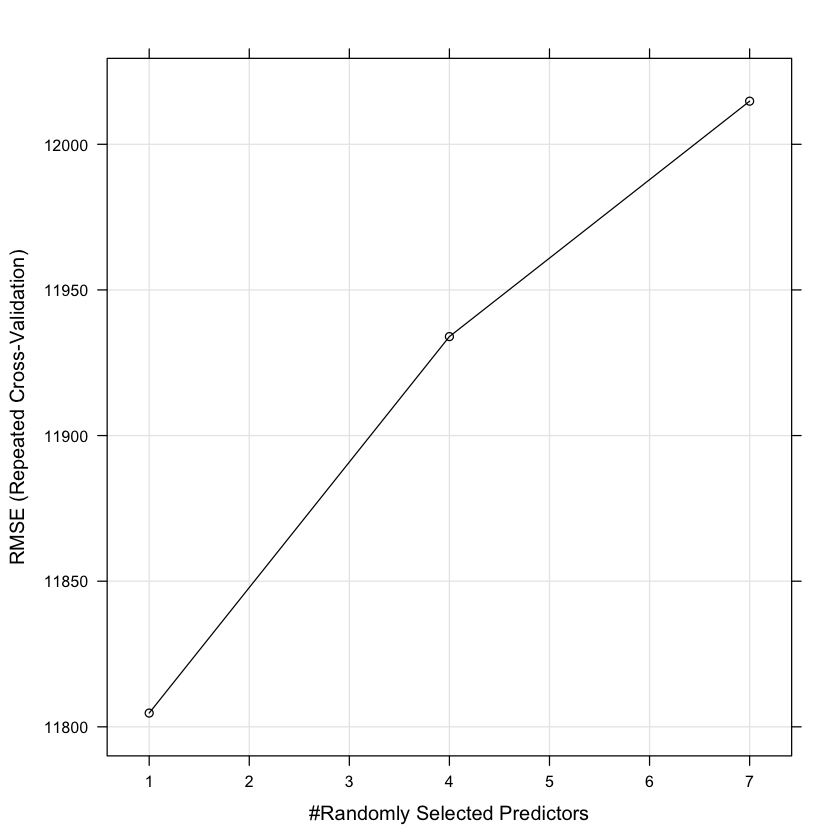

In [610]:
#onews_Predicted_by_RF
plot(rf_onews3)

### SGB for OnlineNews Data Set

In [262]:
set.seed(2019702030)

X <-as.matrix(train_onlinenews%>%select(-url)%>%select(-timedelta)%>%sample_n(2000))


gridsgb_onlinenews <- expand.grid(interaction.depth=seq(1,5,2), n.trees = seq(50,250,100), shrinkage=c(0.005,0.01,0.02), n.minobsinnode=10)

sgb_onlinenews <- train(Y ~., data=X, method="gbm", tuneGrid= gridsgb_onlinenews, trControl= fitControl, verbose=F)



In [263]:
sgb_onlinenews

Stochastic Gradient Boosting 

2000 samples
  58 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1601, 1600, 1600, 1599, 1600, 1601, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  RMSE      Rsquared     MAE     
  0.005      1                   50      11628.31  0.004507451  3218.158
  0.005      1                  150      11807.57  0.003959739  3225.191
  0.005      1                  250      11987.88  0.003489236  3238.520
  0.005      3                   50      11606.36  0.007026918  3205.704
  0.005      3                  150      11766.43  0.006522129  3208.779
  0.005      3                  250      11960.21  0.006648940  3225.706
  0.005      5                   50      11603.09  0.009343420  3202.885
  0.005      5                  150      11758.81  0.008304682  3201.888
  0.005      5                  250      11943.33  0.008313724  3219.569
  0.010      1          

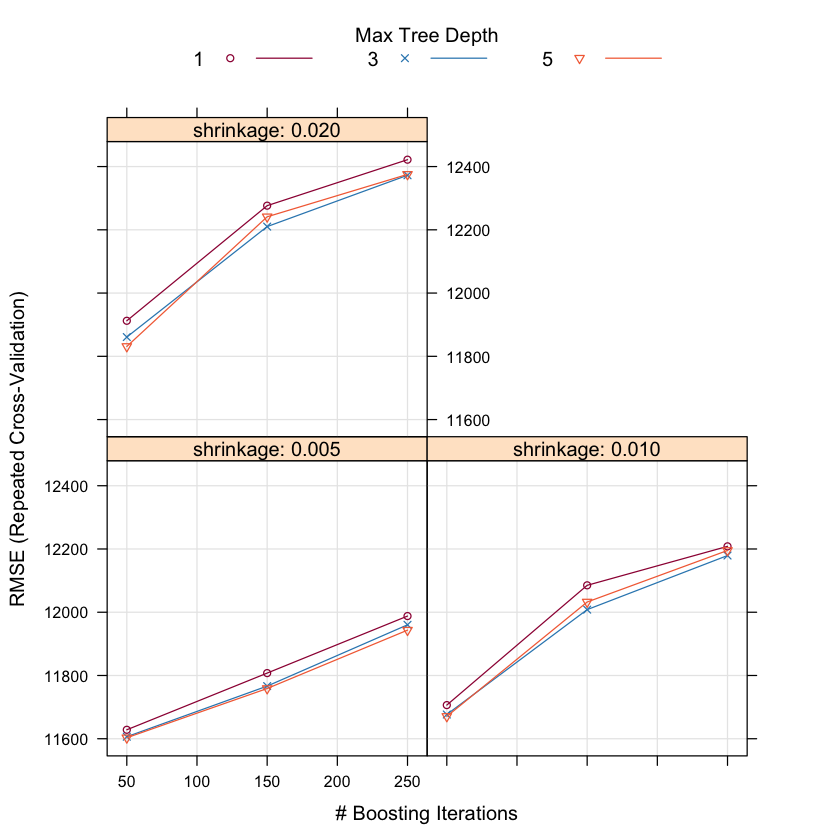

In [615]:
X <-as.matrix(test_onlinenews%>%select(-Y)%>%select(-url)%>%select(-timedelta))

news_Predicted_by_SGB = predict(sgb_onlinenews,X)

onews_Predicted_by_SGB <- data.frame(onews_Predicted_by_SGB)

#onews_Predicted_by_SGB

plot(sgb_onlinenews)

## Comparison for OnlineNews Data Set


Call:
summary.resamples(object = results_onews)

Models: DT, RF, SGB 
Number of resamples: 25 

MAE 
        Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
DT  3161.421 3313.766 3348.676 3348.579 3396.214 3520.945    0
RF  2853.423 3084.300 3166.783 3225.358 3333.295 3828.786    0
SGB 2579.885 2861.234 3041.383 3202.885 3144.013 4406.945    0

RMSE 
        Min.   1st Qu.    Median     Mean   3rd Qu.     Max. NA's
DT  8200.625 11942.747 12911.000 12899.05 14712.919 18941.01    0
RF  5984.689  7584.693  9295.023 11804.73 16346.786 24298.69    0
SGB 3859.610  5226.926  6132.674 11603.09  7148.701 34916.68    0

Rsquared 
            Min.     1st Qu.      Median        Mean     3rd Qu.       Max.
DT  0.0021128422 0.002949965 0.003988204 0.004598481 0.004928152 0.01268277
RF  0.0049795670 0.016661521 0.026070013 0.024869179 0.031828772 0.04989552
SGB 0.0000239632 0.002059213 0.007067186 0.009343420 0.012800150 0.04987894
    NA's
DT     0
RF     0
SGB    0


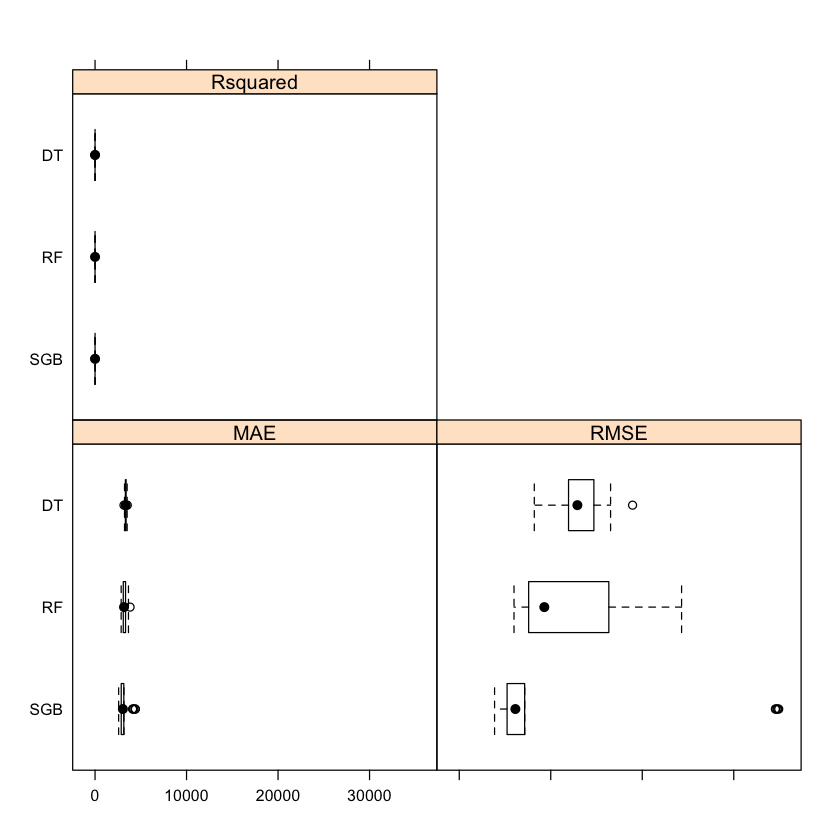

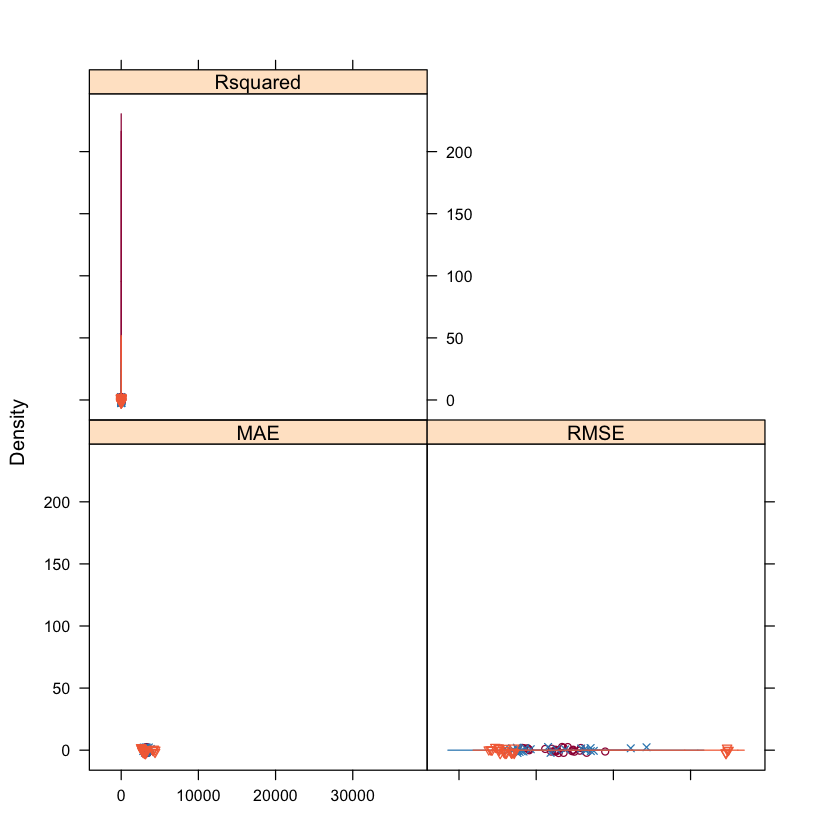

In [649]:
#performance_onlinenews
results_onews = resamples(list(DT=dt_onews5, RF=rf_onews3, SGB=sgb_onlinenews),metrics='RMSE')

#results_creditcard = resamples(list(PRA=PRA_creditcard,DT=dt_creditcard5,RF=rf_creditcard3,SGB=sgb_creditcard),metrics='Accuracy')
summary(results_onews)
bwplot(results_onews)
densityplot(results_onews)
#PRA_creditcard


In [291]:
RMSE_onlinenews_PRA = RMSE(test_onlinenews$Y,onews_Predicted_by_PRA)
RMSE_onlinenews_DT = RMSE(test_onlinenews$Y,as.matrix(onews_Predicted_by_DT))
RMSE_onlinenews_RF = RMSE(test_onlinenews$Y,as.matrix(onews_Predicted_by_RF))
RMSE_onlinenews_SGB = RMSE(test_onlinenews$Y,as.matrix(onews_Predicted_by_SGB))
performance_onlinenews <- data.table(RMSE_onlinenews_PRA, RMSE_onlinenews_DT, RMSE_onlinenews_RF, RMSE_onlinenews_SGB)
#Accuracy_onlinenews_PRA = Accuracy(data.frame(test_onlinenews$Y),onews_Predicted_by_PRA)
#Accuracy_onlinenews_DT = Accuracy(data.frame(test_onlinenews$Y),onews_Predicted_by_DT)
#Accuracy_onlinenews_RF = Accuracy(data.frame(test_onlinenews$Y),onews_Predicted_by_RF)
#Accuracy_onlinenews_SGB = Accuracy(data.frame(test_onlinenews$Y),onews_Predicted_by_SGB)

#performance_onlinenews <- data.table(Accuracy_onlinenews_PRA, Accuracy_onlinenews_DT, Accuracy_onlinenews_RF, Accuracy_onlinenews_SGB)

In [292]:
performance_onlinenews

RMSE_onlinenews_PRA,RMSE_onlinenews_DT,RMSE_onlinenews_RF,RMSE_onlinenews_SGB
<dbl>,<dbl>,<dbl>,<dbl>
7717.362,7620.16,7394.689,7471.083


### Observations

* According to RMSE, Random Forest methods gives the best results as it is expected.
* SGB seems as second better method however there is an inconsistency with training error which can be caused from underfitting.
* Linear model(PRA) and DT are the worst methods for this data which may caused by high number of feature.



# Data 3: 

## Cardiotocography Data Set

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments. 

In my version, I've classified with recpect to fetal state (N, S, P).


Feature Information:

* LB - FHR baseline (beats per minute)
* AC - # of accelerations per second
* FM - # of fetal movements per second
* UC - # of uterine contractions per second
* DL - # of light decelerations per second
* DS - # of severe decelerations per second
* DP - # of prolongued decelerations per second
* ASTV - percentage of time with abnormal short term variability
* MSTV - mean value of short term variability
* ALTV - percentage of time with abnormal long term variability
* MLTV - mean value of long term variability
* Width - width of FHR histogram
* Min - minimum of FHR histogram
* Max - Maximum of FHR histogram
* Nmax - # of histogram peaks
* Nzeros - # of histogram zeros
* Mode - histogram mode
* Mean - histogram mean
* Median - histogram median
* Variance - histogram variance
* Tendency - histogram tendency
* CLASS - FHR pattern class code (1 to 10)
* NSP - fetal state class code (N=normal; S=suspect; P=pathologic)



In [ ]:
cardio <- read_excel("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW4/Hw4 ie582 data/gonlume yatanlar/CTG.xls","Data")


In [313]:
cardio1 <- cardio %>% select(,11:31)
cardio2 <- cardio %>% select(,46)
cardio <-cbind(cardio1,cardio2)

In [325]:
dim(cardio)
cardio<- na.omit(cardio)
dim(cardio)

[1] 2129   22

[1] 2126   22

In [326]:
colnames(cardio)[22] = "Y"

cardio$Y <- as.factor(cardio$Y)
train_cardio<- cardio[1:1400,]
test_cardio <- cardio%>%anti_join(train_cardio)

Joining, by = c("LB", "AC...12", "FM...13", "UC...14", "DL...15", "DS...16", "DP...17", "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency", "Y")



In [323]:
#train_cardio

### PRA for Cardiotography Data Set

In [333]:
set.seed(2019702030)

X <-as.matrix(train_cardio%>%select(-Y))
PRA_cardio = cv.glmnet(x = X, y=as.factor(train_cardio$Y), family="multinomial",  nfolds = 10, alpha=1)

X <-as.matrix(test_cardio%>%select(-Y))
cardio_Predicted_by_PRA = predict(PRA_cardio, newx=X, s=c("lambda.min"), type="class")[,1]



In [338]:
cardio_Predicted_by_PRA <- data.frame(cardio_Predicted_by_PRA)
#cardio_Predicted_by_PRA

### DT for Cardiotography Data Set

In [342]:
n_repeats=5
n_folds=5

tunegrid_cardio <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-(train_cardio)

dt_cardio1=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_cardio, 
                 trControl = fitControl, control = rpart.control(minbucket=c(1))) #
dt_cardio1

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9345661  0.8338074
  0.0010  0.9358523  0.8372846
  0.0015  0.9374247  0.8412785
  0.0020  0.9397095  0.8467512
  0.0025  0.9405656  0.8485649

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0025.

In [343]:
n_repeats=5
n_folds=5

tunegrid_cardio <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-(train_cardio)

dt_cardio2=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_cardio, 
                 trControl = fitControl, control = rpart.control(minbucket=c(5))) #
dt_cardio2

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9361355  0.8370534
  0.0010  0.9361355  0.8369838
  0.0015  0.9361355  0.8369838
  0.0020  0.9365651  0.8377359
  0.0025  0.9368513  0.8381095

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0025.

In [345]:
n_repeats=5
n_folds=5

tunegrid_cardio <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-(train_cardio)

dt_cardio3=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_cardio, 
                 trControl = fitControl, control = rpart.control(minbucket=c(9))) #
dt_cardio3

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9385666  0.8415594
  0.0010  0.9385666  0.8415594
  0.0015  0.9385666  0.8415594
  0.0020  0.9381380  0.8402088
  0.0025  0.9384237  0.8409017

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0015.

In [346]:
n_repeats=5
n_folds=5

tunegrid_cardio <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-(train_cardio)

dt_cardio4=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_cardio, 
                 trControl = fitControl, control = rpart.control(minbucket=c(13))) #
dt_cardio4

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9409967  0.8463312
  0.0010  0.9409967  0.8463312
  0.0015  0.9409967  0.8463312
  0.0020  0.9417110  0.8477691
  0.0025  0.9417110  0.8477691

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0025.

In [347]:
n_repeats=5
n_folds=5

tunegrid_cardio <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-(train_cardio)

dt_cardio5=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_cardio, 
                 trControl = fitControl, control = rpart.control(minbucket=c(17))) #
dt_cardio5

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9384212  0.8383431
  0.0010  0.9384212  0.8383431
  0.0015  0.9381355  0.8374250
  0.0020  0.9381355  0.8374250
  0.0025  0.9378508  0.8366430

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.001.

###### Prediction with the best DT

In [350]:
X <-test_cardio%>%select(-Y)

cardio_Predicted_by_DT = predict(dt_cardio4, X)

cardio_Predicted_by_DT <- data.frame(cardio_Predicted_by_DT)

#cardio_Predicted_by_DT

CART 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9409967  0.8463312
  0.0010  0.9409967  0.8463312
  0.0015  0.9409967  0.8463312
  0.0020  0.9417110  0.8477691
  0.0025  0.9417110  0.8477691

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0025.

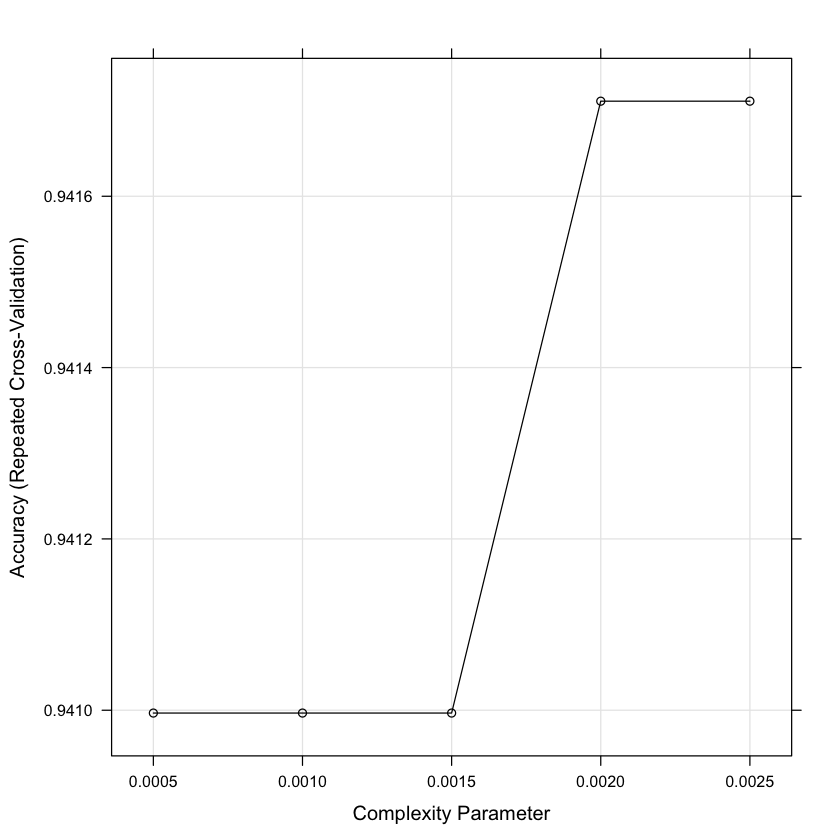

In [603]:
dt_cardio4
#fancyRpartPlot(dt_cardio4)
trellis.par.set(caretTheme())
plot(dt_cardio4) 

### RF for Cardiotography Data Set

In [354]:
set.seed(2019702030)

X <-train_cardio


gridforest_cardio <- expand.grid(mtry = seq(1, 7, 3), min.node.size=5, splitrule = c("gini", "extratrees"))

rf_cardio <- train(Y ~., data=X, method="ranger",tuneGrid= gridforest_cardio, trControl= fitControl)

In [355]:
rf_cardio

Random Forest 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  1     gini        0.8912847  0.6921351
  1     extratrees  0.8028568  0.3108667
  4     gini        0.9441391  0.8541083
  4     extratrees  0.9252813  0.8030359
  7     gini        0.9472794  0.8626353
  7     extratrees  0.9355666  0.8322998

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 7, splitrule = gini
 and min.node.size = 5.

In [356]:
X <- test_cardio%>%select(-Y)

cardio_Predicted_by_RF = predict(rf_cardio,X)

cardio_Predicted_by_RF <- data.frame(cardio_Predicted_by_RF)

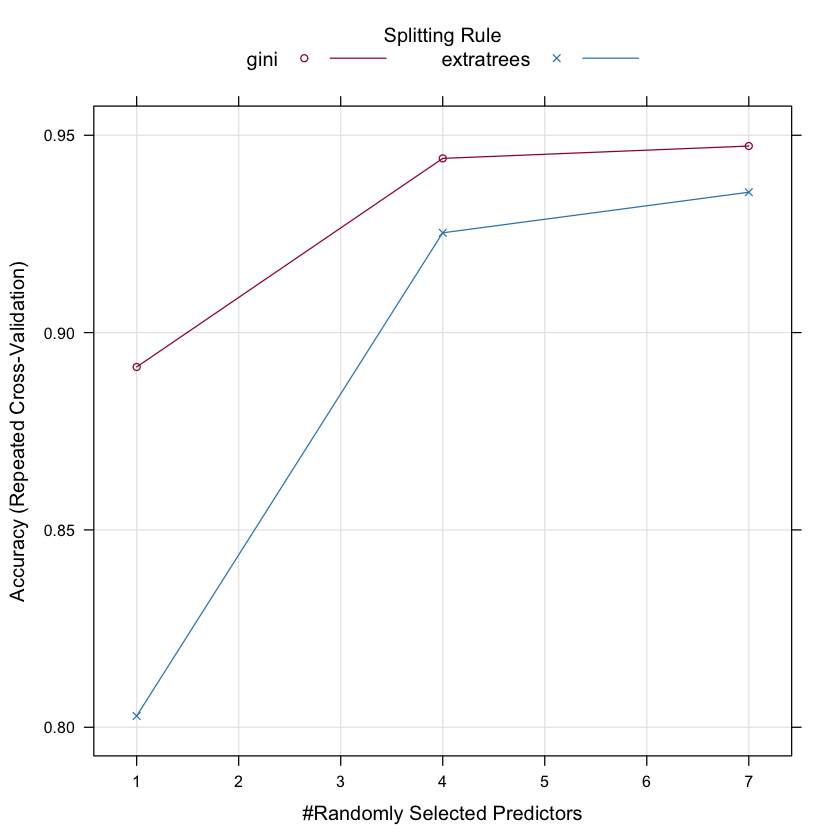

In [611]:
#cardio_Predicted_by_RF
plot(rf_cardio)

### SGB for Cardiotography Data Set

In [360]:
set.seed(2019702030)

X <-train_cardio

gridsgb_cardio <- expand.grid(interaction.depth=seq(1,5,2), n.trees = seq(50,250,100),shrinkage=c(0.005,0.01,0.02), n.minobsinnode=10)

sgb_cardio <- train(Y ~., data=X, method="gbm", tuneGrid= gridsgb_cardio, trControl= fitControl, verbose=F)



Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 6: DS...16 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL

In [361]:
sgb_cardio

Stochastic Gradient Boosting 

1400 samples
  21 predictor
   3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 1121, 1120, 1120, 1120, 1119, 1120, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa    
  0.005      1                   50      0.9127145  0.7637261
  0.005      1                  150      0.9134287  0.7657122
  0.005      1                  250      0.9188558  0.7810289
  0.005      3                   50      0.9372824  0.8348100
  0.005      3                  150      0.9421411  0.8463137
  0.005      3                  250      0.9471350  0.8592925
  0.005      5                   50      0.9412778  0.8440795
  0.005      5                  150      0.9445620  0.8528174
  0.005      5                  250      0.9487085  0.8641412
  0.010      1                   50      0.9134287  0.7657130
  0.010      1                  150      0.

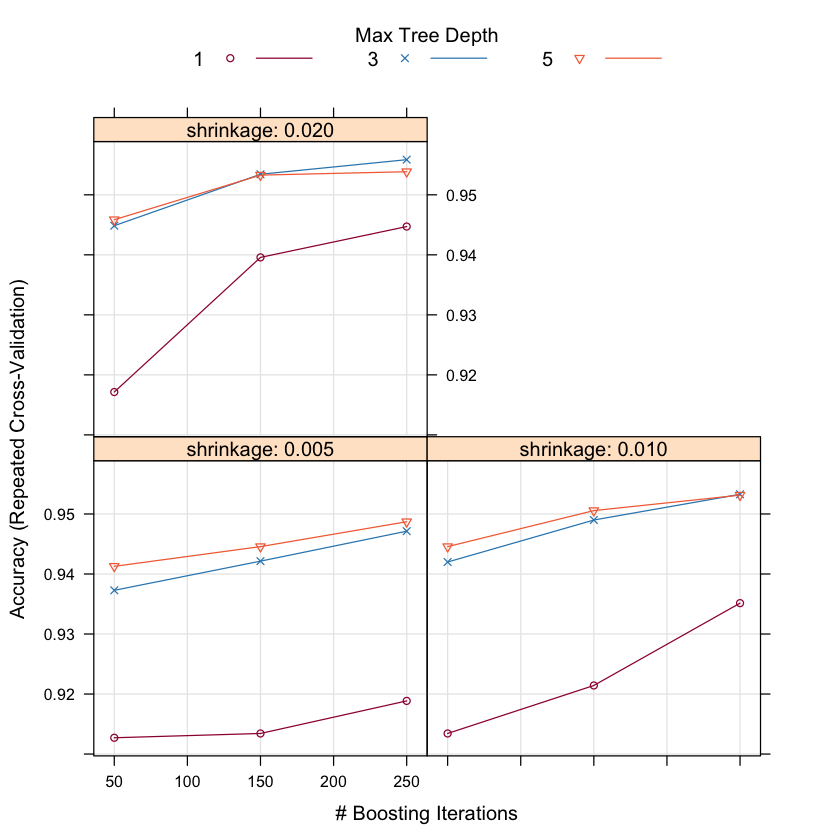

In [614]:
X <-test_cardio%>%select(-Y)

cardio_Predicted_by_SGB = predict(sgb_cardio,X)

cardio_Predicted_by_SGB <- data.frame(cardio_Predicted_by_SGB)

#cardio_Predicted_by_SGB
plot(sgb_cardio)

## Comparison for Cardiotography Data Set

In [366]:

Accuracy_cardio_PRA = Accuracy(data.frame(as.factor(test_cardio$Y)),cardio_Predicted_by_PRA)
Accuracy_cardio_DT = Accuracy(data.frame(as.factor(test_cardio$Y)),data.frame(cardio_Predicted_by_DT))
Accuracy_cardio_RF = Accuracy(data.frame(as.factor(test_cardio$Y)),cardio_Predicted_by_RF)
Accuracy_cardio_SGB = Accuracy(data.frame(as.factor(test_cardio$Y)),cardio_Predicted_by_SGB)

performance_cardio <- data.table(Accuracy_cardio_PRA, Accuracy_cardio_DT, Accuracy_cardio_RF, Accuracy_cardio_SGB)

In [367]:
performance_cardio

Accuracy_cardio_PRA,Accuracy_cardio_DT,Accuracy_cardio_RF,Accuracy_cardio_SGB
<dbl>,<dbl>,<dbl>,<dbl>
0.6997245,0.6253444,0.6570248,0.6391185



Call:
summary.resamples(object = results_cardio)

Models: DT, RF, SGB 
Number of resamples: 25 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
DT  0.9142857 0.9357143 0.9428571 0.9417110 0.9464286 0.9608541    0
RF  0.9139785 0.9392857 0.9466192 0.9472794 0.9535714 0.9678571    0
SGB 0.9354839 0.9535714 0.9569892 0.9558549 0.9607143 0.9750000    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
DT  0.7897664 0.8289554 0.8522219 0.8477691 0.8615643 0.8984226    0
RF  0.7682002 0.8431062 0.8627394 0.8626353 0.8785331 0.9174663    0
SGB 0.8293636 0.8785331 0.8891664 0.8856319 0.8947404 0.9360668    0


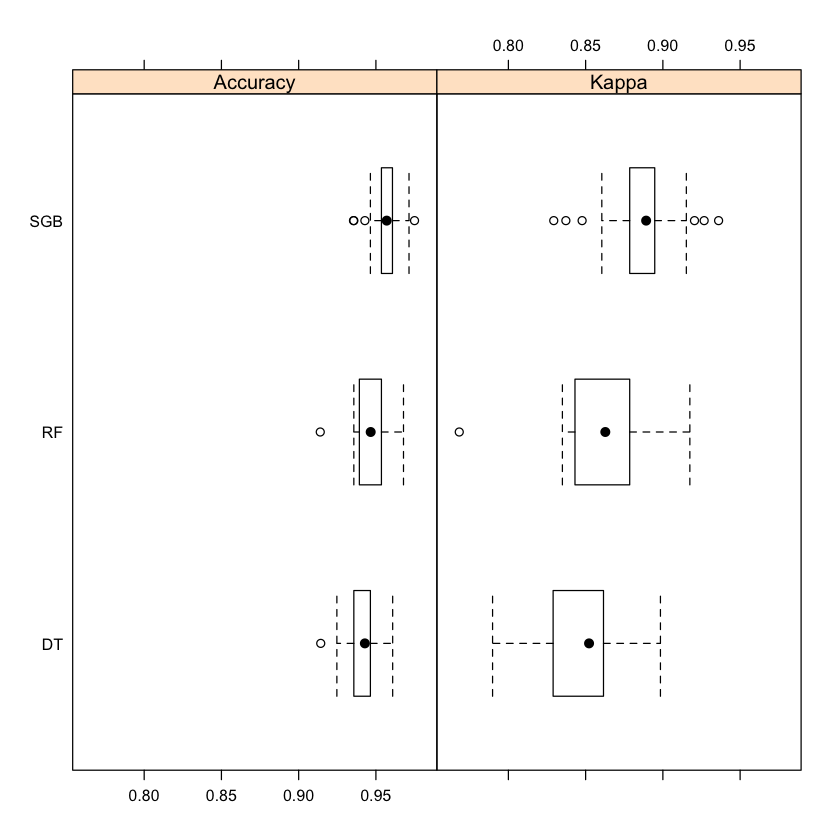

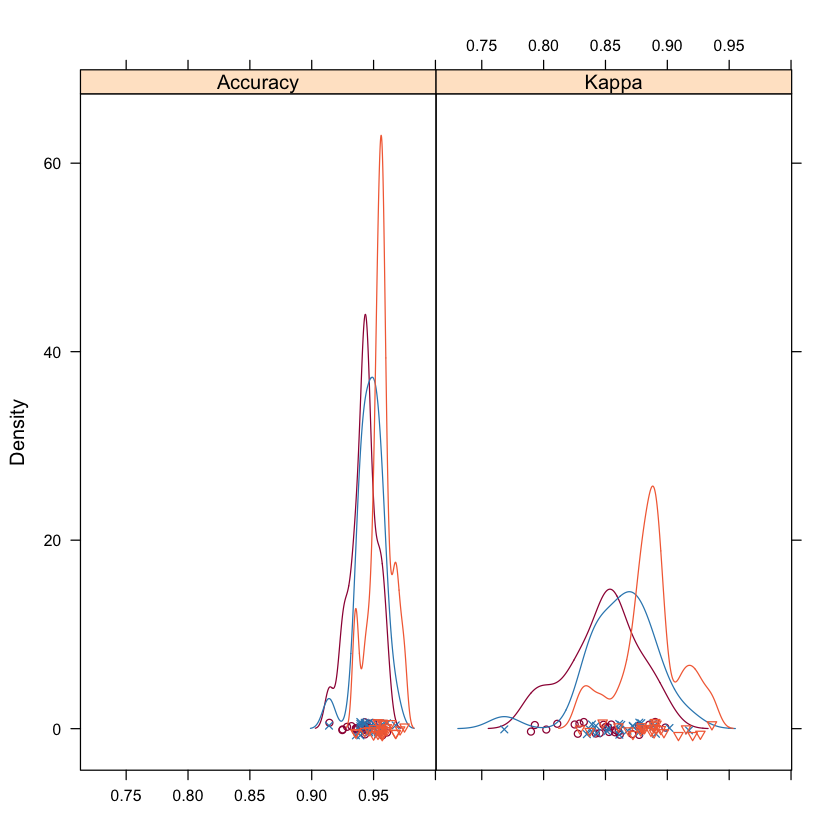

In [651]:
results_cardio = resamples(list( DT=dt_cardio4, RF=rf_cardio, SGB=sgb_cardio),metrics='Accuracy')

#results_creditcard = resamples(list(PRA=PRA_creditcard,DT=dt_creditcard5,RF=rf_creditcard3,SGB=sgb_creditcard),metrics='Accuracy')
summary(results_cardio)
bwplot(results_cardio)
densityplot(results_cardio)

### Observations

* For this dataset, accuracy is lower than the other data set.
This is probably caused from that there is an multi-class classification data set. 
* In this case, PRA provided the best accuracy which may caused by comparibly low number of feature.
* But there is an inconsistency between training and test error for SGB, RF and DT. This may caused by an overfitting since the accuracies are higher (around 94%) with training data.


# Data 4: 

## Spambase Data Set

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

    1, 0.    | spam, non-spam classes

    word_freq_make:         continuous.
    word_freq_address:      continuous.
    word_freq_all:          continuous.
    word_freq_3d:           continuous.
    word_freq_our:          continuous.
    word_freq_over:         continuous.
    word_freq_remove:       continuous.
    word_freq_internet:     continuous.
    word_freq_order:        continuous.
    word_freq_mail:         continuous.
    word_freq_receive:      continuous.
    word_freq_will:         continuous.
    word_freq_people:       continuous.
    word_freq_report:       continuous.
    word_freq_addresses:    continuous.
    word_freq_free:         continuous.
    word_freq_business:     continuous.
    word_freq_email:        continuous.
    word_freq_you:          continuous.
    word_freq_credit:       continuous.
    word_freq_your:         continuous.
    word_freq_font:         continuous.
    word_freq_000:          continuous.
    word_freq_money:        continuous.
    word_freq_hp:           continuous.
    word_freq_hpl:          continuous.
    word_freq_george:       continuous.
    word_freq_650:          continuous.
    word_freq_lab:          continuous.
    word_freq_labs:         continuous.
    word_freq_telnet:       continuous.
    word_freq_857:          continuous.
    word_freq_data:         continuous.
    word_freq_415:          continuous.
    word_freq_85:           continuous.
    word_freq_technology:   continuous.
    word_freq_1999:         continuous.
    word_freq_parts:        continuous.
    word_freq_pm:           continuous.
    word_freq_direct:       continuous.
    word_freq_cs:           continuous.
    word_freq_meeting:      continuous.
    word_freq_original:     continuous.
    word_freq_project:      continuous.
    word_freq_re:           continuous.
    word_freq_edu:          continuous.
    word_freq_table:        continuous.
    word_freq_conference:   continuous.
    char_freq_;:            continuous.
    char_freq_(:            continuous.
    char_freq_[:            continuous.
    char_freq_!:            continuous.
    char_freq_$:            continuous.
    char_freq_#:            continuous.
    capital_run_length_average: continuous.
    capital_run_length_longest: continuous.
    capital_run_length_total:   continuous.



In [524]:
spambase <- read.csv("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW4/Hw4 ie582 data/gonlume yatanlar/spambase.csv",stringsAsFactors = FALSE)

In [525]:
#spambase
dim(spambase)
spambase<-na.omit(spambase)
#spambase<-null.omit(spambase)
dim(spambase)
(is.null(spambase))

[1] 4601   58

[1] 4601   58

[1] FALSE

In [526]:
colnames(spambase)[58] = "Y"

spambase$Y <- as.factor(spambase$Y)
train_spambase<- spambase[1:3000,]
test_spambase <- spambase%>%anti_join(train_spambase)

Joining, by = c("x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38", "x39", "x40", "x41", "x42", "x43", "x44", "x45", "x46", "x47", "x48", "x49", "x50", "x51", "x52", "x53", "x54", "x55", "x56", "x57", "Y")



In [527]:
dim(test_spambase)

[1] 1437   58

### PRA for Spambase Data Set

In [531]:
set.seed(2019702030)

X <-as.matrix(train_spambase%>%select(-Y))
PRA_spambase = cv.glmnet(x = X, y=as.factor(train_spambase$Y), family="binomial",  nfolds = 10, alpha=1)

X <-as.matrix(test_spambase%>%select(-Y))
spambase_Predicted_by_PRA = predict(PRA_spambase, newx=X, s=c("lambda.min"), type="class")[,1]




In [532]:
PRA_spambase


Call:  cv.glmnet(x = X, y = as.factor(train_spambase$Y), nfolds = 10,      family = "binomial", alpha = 1) 

Measure: Binomial Deviance 

       Lambda Measure      SE Nonzero
min 0.0006156  0.3684 0.01736      52
1se 0.0024850  0.3839 0.01673      45

In [530]:
n_repeats=5
n_folds=5

set.seed(2019702030)

fitControl=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)

X <-train_spambase

lr_fit_spambase=train(Y ~ ., data = X,
                 method = "glmnet", 
                 trControl = fitControl) #
lr_fit_spambase

In [474]:
X <-test_spambase%>%select(-Y)

spambase_Predicted_by_PRA = predict(lr_fit_spambase,X)

spambase_Predicted_by_PRA <- data.frame(spambase_Predicted_by_PRA)

In [535]:
spambase_Predicted_by_PRA <- data.frame(spambase_Predicted_by_PRA)
#spambase_Predicted_by_PRA

### DT for Spambase Data Set

In [477]:
sum(duplicated(train_spambase))
#train_spambase<-unique(train_spambase)
#str(train_spambase)

[1] 192

In [559]:
n_repeats=5
n_folds=5

tunegrid_spambase <- expand.grid(cp=seq(0.0005,0.0015,0.0005))

set.seed(2019702030)

X <-(train_spambase)

dt_spambase1=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_spambase, 
                 trControl = fitControl, control = rpart.control(minbucket=c(1))) #

dt_spambase1

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9206655  0.8337623
  0.0010  0.9249998  0.8428591
  0.0015  0.9255337  0.8440317

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0015.

In [560]:
dt_spambase1

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9206655  0.8337623
  0.0010  0.9249998  0.8428591
  0.0015  0.9255337  0.8440317

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0015.

In [484]:
n_repeats=5
n_folds=10

set.seed(2019702030)

X <-as.matrix(train_spambase)

dt_spambase1=train(Y ~ ., data = X,
                 method = "rpart", 
                 trControl = fitControl, tuneLength = 6) #

dt_spambase1

In [521]:
dt_spambase1

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.7466670  0.4633990
  0.0010  0.7469337  0.4630197
  0.0015  0.7455346  0.4599085
  0.0020  0.7461993  0.4614236
  0.0025  0.7369997  0.4411531

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.001.

In [485]:
n_repeats=5
n_folds=10

tunegrid_spambase <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_spambase)

dt_spambase2=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_spambase, 
                 trControl = fitControl, control = rpart.control(minbucket=c(5))) #

dt_spambase2

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.7290680  0.4287774
  0.0010  0.7294664  0.4292668
  0.0015  0.7291335  0.4280169
  0.0020  0.7284668  0.4258068
  0.0025  0.7275327  0.4218323

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.001.

In [487]:
n_repeats=5
n_folds=5

tunegrid_spambase <- expand.grid(cp=seq(0.0005,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_spambase)

dt_spambase3=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_spambase, 
                 trControl = fitControl, control = rpart.control(minbucket=c(9))) #

dt_spambase3

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.7173342  0.4041127
  0.0010  0.7192660  0.4055875
  0.0015  0.7189988  0.4012844
  0.0020  0.7197327  0.4020201
  0.0025  0.7181347  0.3949001

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.002.

In [489]:
n_repeats=5
n_folds=5

tunegrid_spambase <- expand.grid(cp=seq(0.003,0.0040,0.0005))

set.seed(2019702030)

X <-as.matrix(train_spambase)

dt_spambase4=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_spambase, 
                 trControl = fitControl, control = rpart.control(minbucket=c(13))) #

dt_spambase4

In [550]:
n_repeats=5
n_folds=5

tunegrid_spambase <- expand.grid(cp=seq(0.00,0.0025,0.0005))

set.seed(2019702030)

X <-as.matrix(train_spambase)

dt_spambase5=train(Y ~ ., data = X,
                 method = "rpart", tuneGrid = tunegrid_spambase, 
                 trControl = fitControl, control = rpart.control(minbucket=c(17))) #

#dt_spambase5

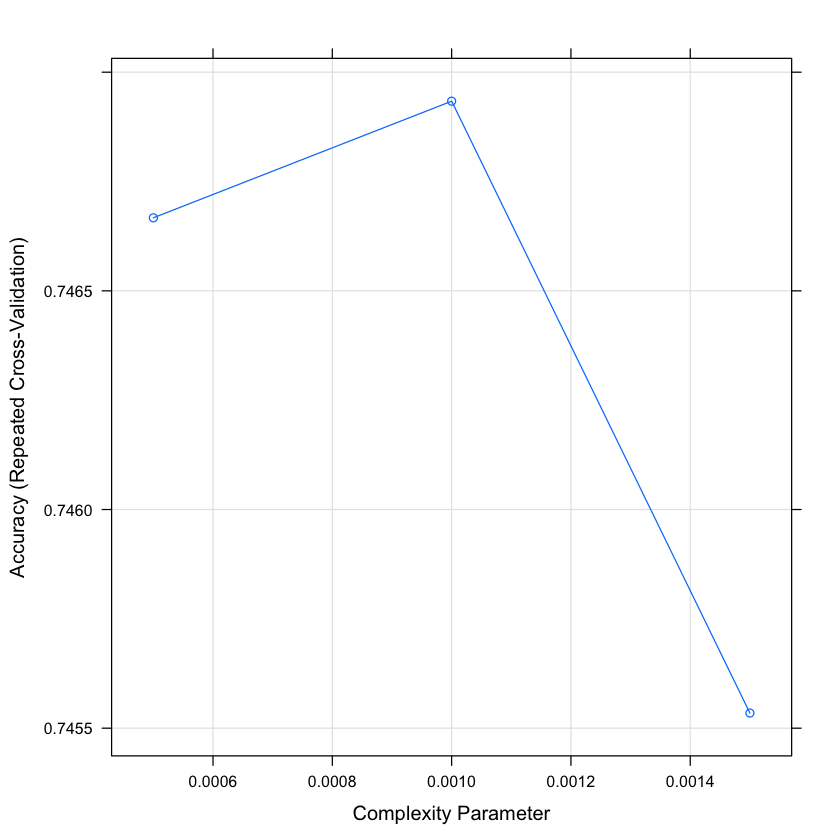

In [552]:
#str(X)
plot(dt_spambase1)


In [561]:
#X <- test_spambase%>%select(-Y)

X <-(test_spambase%>%select(-Y))

spambase_Predicted_by_DT = predict(dt_spambase1, X)

spambase_Predicted_by_DT <- data.frame(spambase_Predicted_by_DT)

CART 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0005  0.9206655  0.8337623
  0.0010  0.9249998  0.8428591
  0.0015  0.9255337  0.8440317

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0015.

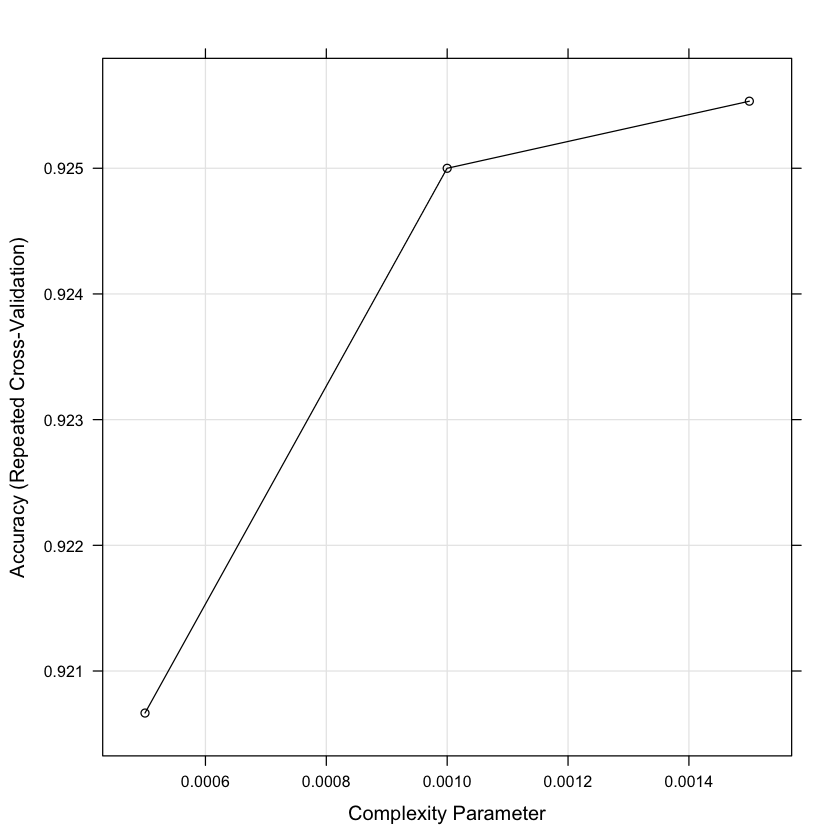

In [602]:
#spambase_Predicted_by_DT

dt_spambase1
#fancyRpartPlot(dt_spambase1)
trellis.par.set(caretTheme())
plot(dt_spambase1)  


### RF for Spambase Data Set

In [563]:
set.seed(2019702030)

X <-(train_spambase)



gridforest_spambase <- expand.grid(mtry = seq(1, 7, 3), min.node.size=5, splitrule = "extratrees")

rf_spambase <- train(Y ~., data=X, method="ranger",tuneGrid= gridforest_spambase, trControl= fitControl)

In [565]:
rf_spambase

Random Forest 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.9082659  0.8041337
  4     0.9555997  0.9071020
  7     0.9583334  0.9127955

Tuning parameter 'splitrule' was held constant at a value of extratrees

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 7, splitrule = extratrees
 and min.node.size = 5.

In [566]:
X <- (test_spambase%>%select(-Y))

spambase_Predicted_by_RF = predict(rf_spambase,X)



spambase_Predicted_by_RF <- data.frame(spambase_Predicted_by_RF)

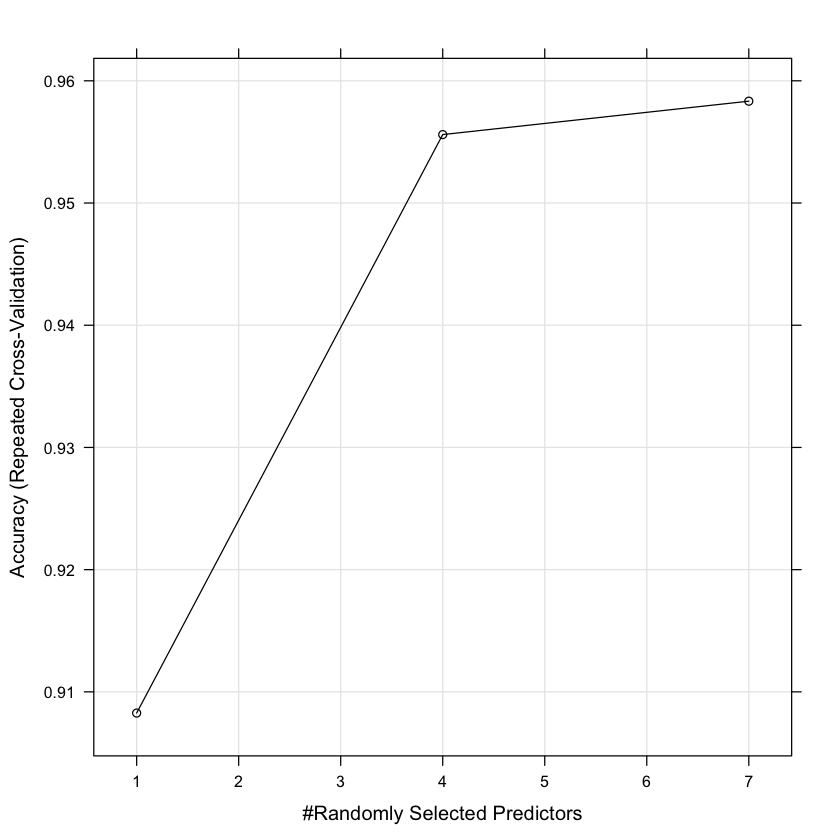

In [612]:
#spambase_Predicted_by_RF 
plot(rf_spambase)

### SGB for Spambase Data Set

In [577]:
set.seed(2019702030)

X <-(train_spambase)

gridsgb_spambase <- expand.grid(interaction.depth=seq(1,5,2), n.trees = seq(50,250,100),shrinkage=c(0.005,0.01,0.02), n.minobsinnode=10)

sgb_spambase <- train(Y ~., data=X, method="gbm", tuneGrid= gridsgb_spambase, trControl= fitControl, verbose=F)




In [578]:
sgb_spambase

Stochastic Gradient Boosting 

3000 samples
  57 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa    
  0.005      1                   50      0.6043334  0.0000000
  0.005      1                  150      0.7594043  0.4398706
  0.005      1                  250      0.8786636  0.7397861
  0.005      3                   50      0.7268107  0.3504886
  0.005      3                  150      0.9010689  0.7883755
  0.005      3                  250      0.9121345  0.8144671
  0.005      5                   50      0.7843321  0.5043652
  0.005      5                  150      0.9151339  0.8190863
  0.005      5                  250      0.9285341  0.8495509
  0.010      1                   50      0.7447344  0.4013162
  0.010      1                  150      0.88679

In [652]:

X <-(test_spambase%>%select(-Y))

spambase_Predicted_by_SGB = predict(sgb_spambase,X)

spambase_Predicted_by_SGB <- data.frame(spambase_Predicted_by_SGB)

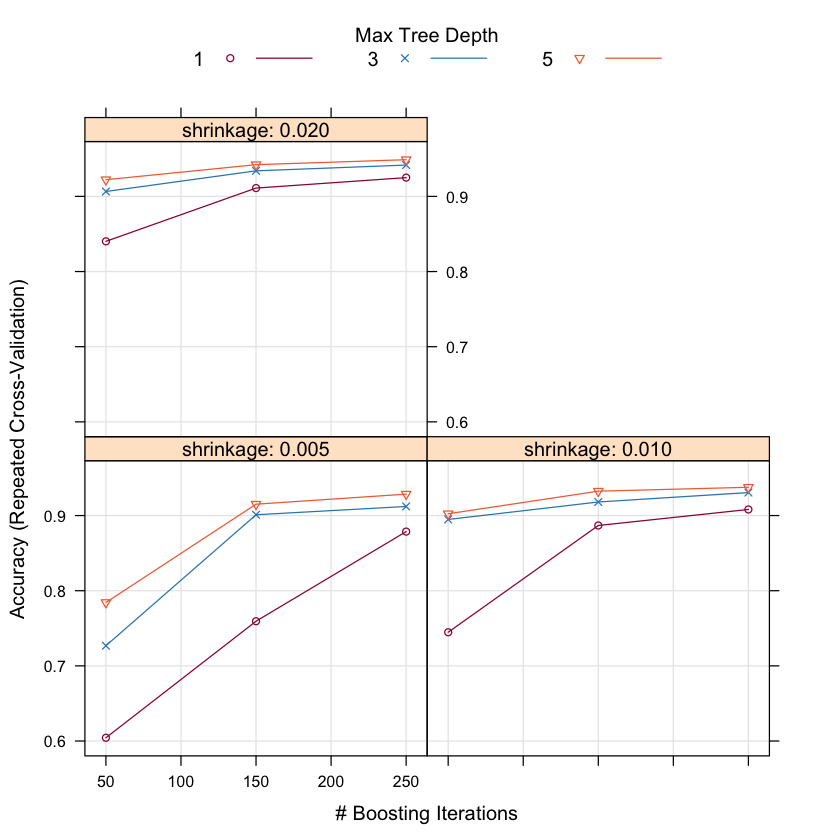

In [653]:
#spambase_Predicted_by_SGB 
plot(sgb_spambase)

## Comparison for Spambase Data Set

In [654]:

Accuracy_spambase_PRA = Accuracy(data.frame(as.factor(test_spambase$Y)),spambase_Predicted_by_PRA)
Accuracy_spambase_DT = Accuracy(data.frame(as.factor(test_spambase$Y)),data.frame(spambase_Predicted_by_DT))
Accuracy_spambase_RF = Accuracy(data.frame(as.factor(test_spambase$Y)),spambase_Predicted_by_RF)
Accuracy_spambase_SGB = Accuracy(data.frame(as.factor(test_spambase$Y)),spambase_Predicted_by_SGB)

performance_spambase <- data.table(Accuracy_spambase_PRA, Accuracy_spambase_DT, Accuracy_spambase_RF, Accuracy_spambase_SGB)

In [655]:
performance_spambase

Accuracy_spambase_PRA,Accuracy_spambase_DT,Accuracy_spambase_RF,Accuracy_spambase_SGB
<dbl>,<dbl>,<dbl>,<dbl>
0.7731385,0.782881,0.8135003,0.7981907



Call:
summary.resamples(object = results_spambase)

Models: PRA, DT, RF, SGB 
Number of resamples: 25 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
PRA 0.9181970 0.9334443 0.9383333 0.9387986 0.9450000 0.9566667    0
DT  0.9066667 0.9168053 0.9267887 0.9255337 0.9333333 0.9466667    0
RF  0.9417637 0.9549249 0.9582638 0.9583334 0.9633333 0.9716667    0
SGB 0.9348915 0.9433333 0.9467554 0.9488651 0.9566667 0.9666667    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
PRA 0.8283196 0.8609228 0.8709300 0.8719158 0.8850094 0.9089423    0
DT  0.8026481 0.8254540 0.8462898 0.8440317 0.8598998 0.8885755    0
RF  0.8774634 0.9055387 0.9126634 0.9127955 0.9233957 0.9406756    0
SGB 0.8631563 0.8821191 0.8886960 0.8930022 0.9089349 0.9305628    0


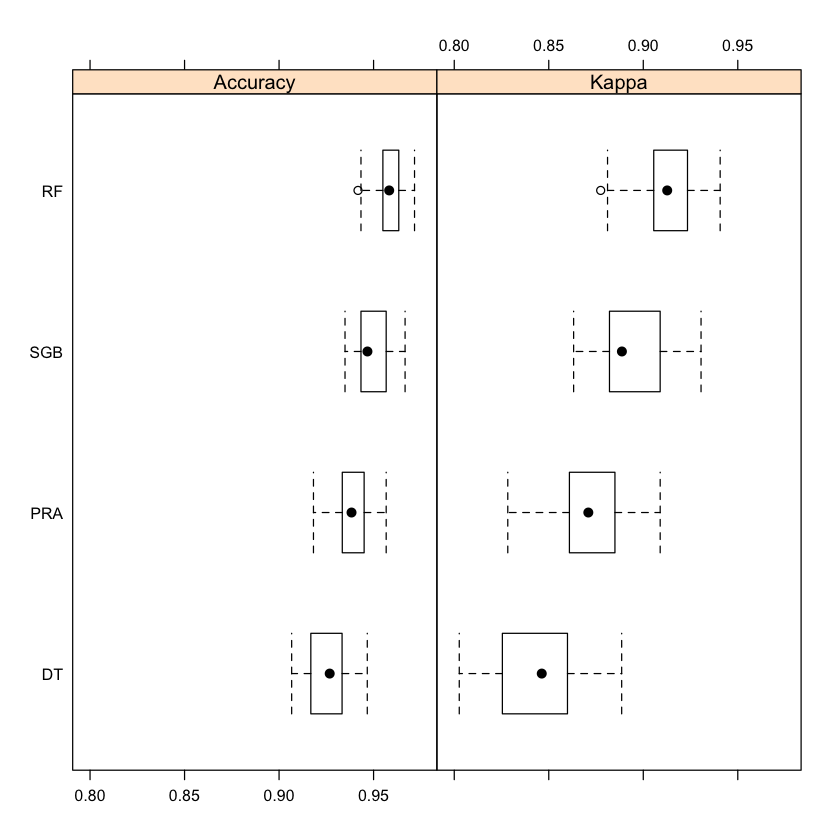

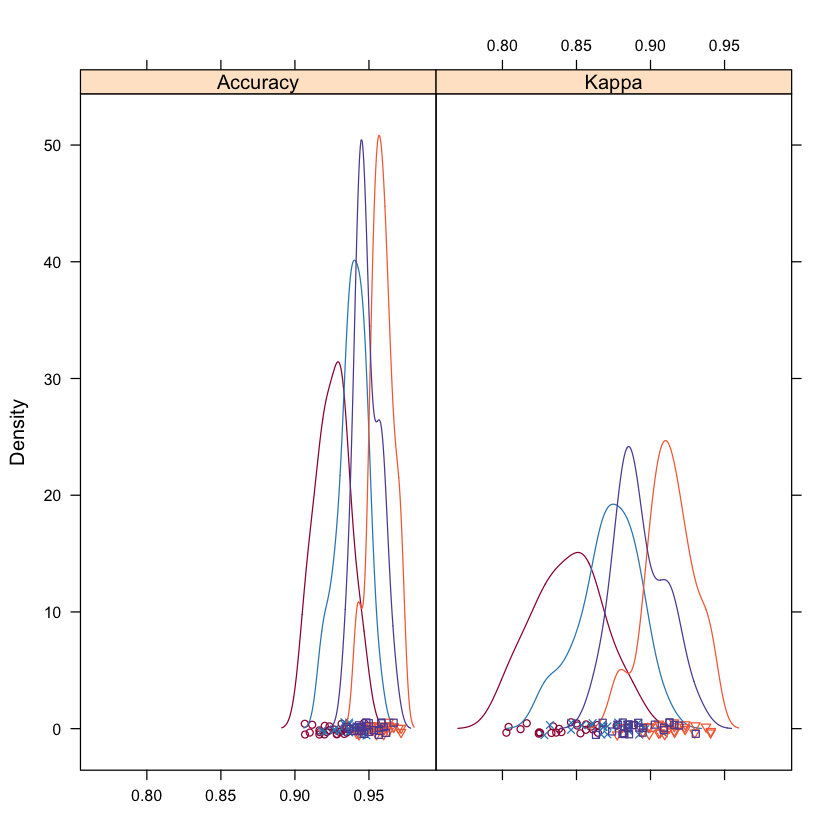

In [656]:
results_spambase = resamples(list( PRA=lr_fit_spambase,DT=dt_spambase1, RF=rf_spambase, SGB=sgb_spambase),metrics='Accuracy')

#results_creditcard = resamples(list(PRA=PRA_creditcard,DT=dt_creditcard5,RF=rf_creditcard3,SGB=sgb_creditcard),metrics='Accuracy')
summary(results_spambase)
bwplot(results_spambase)
densityplot(results_spambase)

### Observations

* In this case, RF provided the best accuracy. 
* With 50+ feature, it is seen that again, RF performs better.
* SGB and DT is slightly behind RF.
* Again, PRA is the worst with high number of features.
* But there is an inconsistency between training and test error for DT. This may caused by an underfitting.